## Iris Dataset Classification using K-Nearest Neighbors with Dimension Reduction

kNN을 이용하여 PCA가 적용된 Mnist 데이터셋 분류

<span style="color: #2D3748; background-color:#fff5b1;">PCA를 적용하여 feature의 수를 2개와 3개로 구성한 후 kNN을 이용하여 실험한 결과 정확도 측면에서는 PCA를 적용하지 않은 방법과 비슷하지만 분류 시간의 경우 PCA를 적용하지 않은 경우 시간이 증가하였다.</span>

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [16]:
comparison_test = []
comparison_time = []

## kNN with PCA feature 3

In [17]:
mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"], mnist["target"]
y = y.astype(np.int64)
print(f'Mnist Data shape X: {X.shape}, y: {y.shape}')

Mnist Data shape X: (70000, 784), y: (70000,)


In [18]:
pca = PCA(n_components=3)
features = pca.fit(X).transform(X)
target = y
print(features.shape)

(70000, 3)


In [19]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  56000  / test size :  14000
----------------------------------------
Test set score: 0.435279
Training Time : 0.1122 sec


## kNN with PCA feature 2

In [20]:
pca = PCA(n_components=2)
features = pca.fit(X).transform(X)
target = y

print(features.shape)

(70000, 2)


In [21]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  56000  / test size :  14000
----------------------------------------
Test set score: 0.380079
Training Time : 0.1171 sec


## kNN with PCA feature with 0.9 proportion of variance

In [22]:
pca = PCA(n_components=0.9)
features = pca.fit(X).transform(X)
target = y

print(features.shape)

(70000, 87)


In [23]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  56000  / test size :  14000
----------------------------------------
Test set score: 0.975821
Training Time : 7.6689 sec


## kNN with PCA feature with 0.8 proportion of variance

In [24]:
pca = PCA(n_components=0.8)
features = pca.fit(X).transform(X)
target = y

print(features.shape)

(70000, 43)


In [25]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  56000  / test size :  14000
----------------------------------------
Test set score: 0.975971
Training Time : 7.5714 sec


## kNN with PCA feature with 0.7 proportion of variance

In [26]:
pca = PCA(n_components=0.7)
features = pca.fit(X).transform(X)
target = y

print(features.shape)

(70000, 26)


In [27]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  56000  / test size :  14000
----------------------------------------
Test set score: 0.973807
Training Time : 7.5715 sec


## K-Nearest Neighbor

In [28]:
avg_test_acc = []
avg_time = []

max_seed = 10

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)

    start = time.perf_counter()
    test_score = knn.score(x_test, y_test)
    end = time.perf_counter() - start

    avg_test_acc.append(test_score)
    avg_time.append(end)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print("-----" * 8)
print("Test set score: %f" % np.array(avg_test_acc).mean())
print("Training Time : %.4f" % np.array(avg_time).mean(), "sec")

comparison_test.append(np.array(avg_test_acc).mean())
comparison_time.append(np.array(avg_time).mean())

train size :  56000  / test size :  14000
----------------------------------------
Test set score: 0.972400
Training Time : 10.9433 sec


### Method Comparison

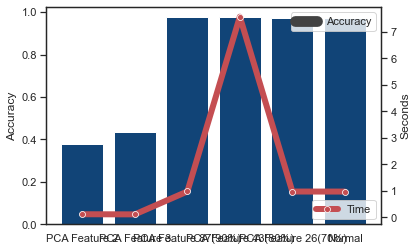

In [35]:
import seaborn as sns

sns.set(style="white", rc={"lines.linewidth": 6})

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(x=["PCA Feature 2", "PCA Feature 3", "PCA Feature 87(90%)", "PCA Feature 43(80%)", "PCA Feature 26(70%)", "Normal"],
            y=[comparison_test[1], comparison_test[0], comparison_test[2], comparison_test[3], comparison_test[4], comparison_test[5]], 
            color='#004488',
            ax=ax1)

sns.lineplot(x=["PCA Feature 2", "PCA Feature 3", "PCA Feature 87(90%)", "PCA Feature 43(80%)", "PCA Feature 26(70%)", "Normal"], 
             y=[comparison_time[1], comparison_time[0], comparison_test[2], comparison_time[3], comparison_test[4], comparison_test[5]],
             color='r',
             marker="o",
             ax=ax2)

ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Seconds")

ax1.legend(["Accuracy"], loc=1)
ax2.legend(["Time"], loc=4)

plt.show()
sns.set()

In [36]:
comparison_time

[0.11222682000006898,
 0.11712853999997605,
 7.668937879999976,
 7.571387040000036,
 7.57145432000002,
 10.943258680000099]